In [256]:
!pip install deap
%matplotlib inline

In [0]:
from deap import creator, base, tools, algorithms
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [0]:
C = 6404180
S = 24
MAX_PROFIT = 13549094
OPTIMAL_SOLUTION = [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,]
WEIGHTS = pd.read_csv('http://people.sc.fsu.edu/~jburkardt%20/datasets/knapsack_01/p08_w.txt', sep='\n', header=None)[0]
PROFITS = pd.read_csv('http://people.sc.fsu.edu/~jburkardt%20/datasets/knapsack_01/p08_p.txt', sep='\n', header=None)[0]


In [259]:
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
toolbox = base.Toolbox()

In [0]:
toolbox.register('pick', np.random.choice, (True,False))
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.pick, S)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)



In [0]:
def evaluate(indv):
  total_profit = 0
  total_weight = 0 
  for i,g in enumerate(indv):
    if g:
      total_weight += WEIGHTS[i]
      total_profit +=  PROFITS[i]
      
  if total_weight <= C:
    return total_profit,
  else:
    return 0,

In [0]:
toolbox.register('evaluate', evaluate)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.3)
toolbox.register('select', tools.selNSGA2)

In [304]:
pop = toolbox.population(n=100)
stats = tools.Statistics(lambda indv: indv.fitness.values)
stats.register('avg', np.mean, axis=0)
stats.register('std', np.std, axis=0)
stats.register('max', np.max, axis=0)
stats.register('min', np.min, axis=0)

history = algorithms.eaMuPlusLambda(pop, toolbox, mu=len(pop), lambda_=len(pop)*2, cxpb=0.5, mutpb=0.4, ngen=50, stats=stats)

gen	nevals	avg        	std               	max        	min 
0  	100   	[4828773.2]	[5233493.77849011]	[12917890.]	[0.]
1  	181   	[11360176.02]	[1054229.06758079]	[13271612.]	[9254929.]
2  	179   	[12254913.81]	[420545.86899385] 	[13271612.]	[11566114.]
3  	177   	[12577596.01]	[281744.33024544] 	[13338386.]	[12145735.]
4  	187   	[12697797.12]	[227115.95256218] 	[13338386.]	[12387226.]
5  	185   	[12792431.45]	[184850.23841491] 	[13338386.]	[12539841.]
6  	182   	[12883185.65]	[146357.27694668] 	[13338386.]	[12676735.]
7  	166   	[12967820.11]	[120526.86947946] 	[13338386.]	[12794122.]
8  	173   	[13031542.25]	[103839.01385215] 	[13338386.]	[12909102.]
9  	178   	[13081328.89]	[89803.87099907]  	[13338386.]	[12954192.]
10 	180   	[13122775.]  	[76217.31341749]  	[13428259.]	[13031237.]
11 	175   	[13160664.11]	[69456.20584151]  	[13428259.]	[13059030.]
12 	190   	[13191028.74]	[68263.26361941]  	[13428259.]	[13115580.]
13 	183   	[13215764.67]	[62871.36484554]  	[13428259.]	[13160626.]

In [0]:
evolution = pd.DataFrame(history[1])

In [0]:
optimal_pop = pd.DataFrame(history[0], index=None)

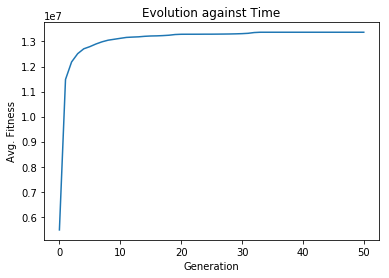

In [301]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(evolution['gen'], evolution['avg'])
ax.set_title('Evolution against Time')
ax.set_ylabel('Avg. Fitness')
ax.set_xlabel('Generation')
plt.show()

In [0]:
plt.close('all')

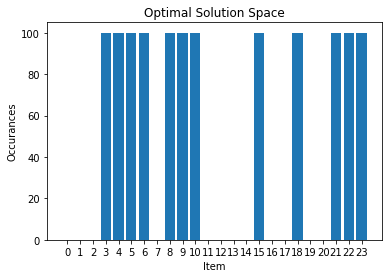

In [303]:
solutions_features = optimal_pop.sum(axis=0)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.bar(solutions_features.index, solutions_features)
ax.set_title('Optimal Solution Space')
ax.set_ylabel('Occurances')
ax.set_xlabel('Item')
ax.set_xticks(solutions_features.index)
plt.show()

In [323]:
creator.create('FitnessMax', base.Fitness, weights=(1.0, -1.0))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.pick, S)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)


/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
def evaluate_multi_objective(indv):
  total_profit = 0
  total_weight = 0 
  for i,g in enumerate(indv):
    if g:
      total_weight += WEIGHTS[i]
      total_profit +=  PROFITS[i]
      
  if total_weight <= C:
    return (total_profit, total_weight)
  else:
    return (0, C)

In [0]:
toolbox.register('evaluate', evaluate_multi_objective)


In [0]:
pop = toolbox.population(n=100)
stats = tools.Statistics(lambda indv: indv.fitness.values)
stats.register('avg', np.mean, axis=0)
stats.register('std', np.std, axis=0)
stats.register('max', np.max, axis=0)
stats.register('min', np.min, axis=0)

history = algorithms.eaMuPlusLambda(pop, toolbox, mu=len(pop), lambda_=len(pop)*2, cxpb=0.5, mutpb=0.4, ngen=200, stats=stats)

gen	nevals	avg                    	std                                	max                  	min                
0  	100   	[5426207.52 5889374.63]	[5524901.2350082   722240.08447843]	[12841327.  6404180.]	[      0. 3653989.]
1  	180   	[10156944.76  4992808.74]	[1719274.7498118   814002.38484065]	[13163806.  6385466.]	[6118567. 3069255.]
2  	175   	[9817079.03 4769171.4 ]  	[2085011.31431169  986548.95288038]	[13163806.  6385466.]	[4310048. 2068978.]
3  	182   	[9239322.31 4448716.53]  	[2296356.04488703 1089466.72633765]	[13163806.  6385466.]	[4310048. 2068978.]
4  	178   	[9140237.27 4380816.38]  	[2484354.63869342 1188293.9868852 ]	[13163806.  6385466.]	[2886528. 1407878.]
5  	180   	[8883685.36 4235637.75]  	[2797475.87995349 1332307.21726962]	[13163806.  6385466.]	[2856273. 1392919.]
6  	174   	[8511305.75 4043404.54]  	[3001323.45103958 1424598.20686198]	[13327422.  6373791.]	[2130600. 1059743.]
7  	177   	[8160958.79 3872051.  ]  	[3144217.60929846 1487650.63314332]	[13327422. 

In [321]:
history[0][0].fitness.values

(13421675.0,)